In [131]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os, sys
from astropy.stats import sigma_clip
from datetime import datetime
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set()
from scipy.stats import norm
import pandas as pd
import warnings
import matplotlib.mlab as mlab
from pandas import DataFrame

In [ ]:
#for cosmic ray subtraction compare two images

### EXERCISE A

In [132]:
hdu_arcs = fits.open('/home/jovyan/ASTR_136/Spec/arcs.fits')
header_arcs = hdu_arcs[0].header
arcs_exp = header_arcs['EXPTIME']
arcs_data = hdu_arcs[0].data

arcs = arcs_data/arcs_exp
arcs = arcs[:,50:2062] #cuts first and last 50 rows

(0.0, 300.0)

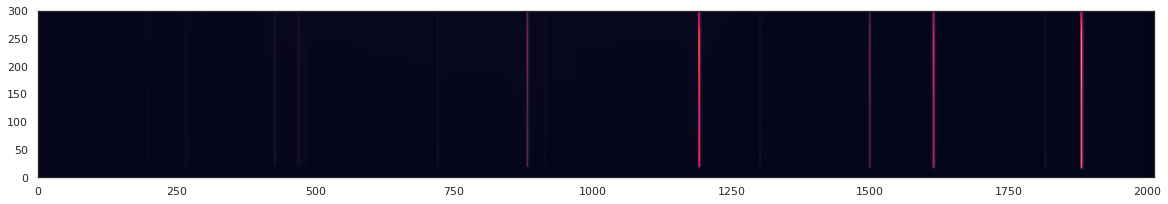

In [133]:
sns.set(style='white')
plt.figure(figsize=(20,40))
plt.imshow(arcs)
plt.ylim(0,300)

In [134]:
arcs.shape

(325, 2012)

In [135]:
intensity = np.mean(arcs, axis = 0)
columns = np.arange(0,2012,1)

Text(0, 0.5, 'Intensity(counts/sec)')

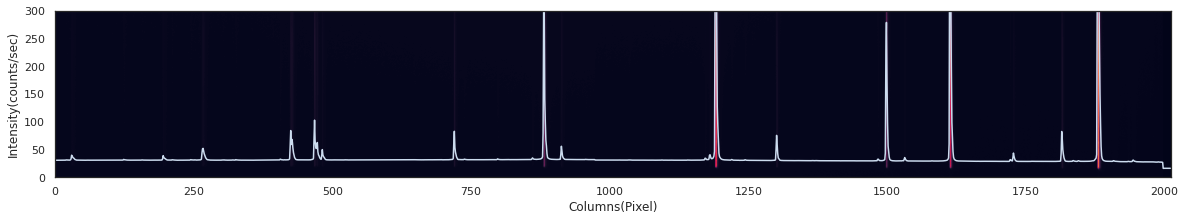

In [136]:
sns.set(style='white')
palette = sns.cubehelix_palette(4, start =3
                                ,rot=-.1)
sns.set_palette(palette)
plt.figure(figsize=(20,40))
sns.lineplot(columns,intensity, palette = palette)
plt.imshow(arcs)
plt.ylim(0,300)


plt.xlabel('Columns(Pixel)') 
plt.ylabel('Intensity(counts/sec)') 

    


In [137]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(intensity, height = 50)

Text(0.5, 1.0, 'Arc-Lamp Spectrum')

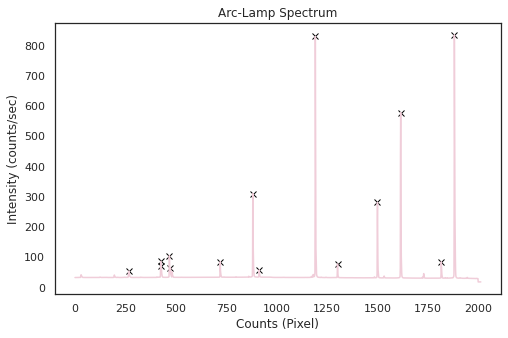

In [138]:
palette = sns.cubehelix_palette(4, start =1
                                ,rot=-.1)
sns.set_palette(palette)
plt.figure(figsize=(8,5))
plt.plot(peaks, intensity[peaks], "x",color='black')
sns.lineplot(columns,intensity, palette = palette)
plt.xlabel('Counts (Pixel)')
plt.ylabel('Intensity (counts/sec)')
plt.title('Arc-Lamp Spectrum')

In [179]:
pixel_loc = 267,  425,  468,  473,  720,  882,  913, 1191, 1301, 1499,1614, 1815, 1880

In [180]:
wavelengths = (3466.55,3610.51,3650.15,3662.88,3888.65,
               4046.56,4077.83,
               4358.33,4471.50,4678.16,4799.92,5015.68,5085.82)

In [181]:
wavelengths = np.array(wavelengths)
pixel_loc = np.array(pixel_loc)

In [182]:
m, b = np.polyfit(pixel_loc, wavelengths, 1)

In [183]:
# Linear function:
def func(x,m,b):
    f = []
    for i in x:
        y_func = m*i + b
        f.append(y_func)
    return f

In [184]:
y_fit = func(pixel_loc,m,b)

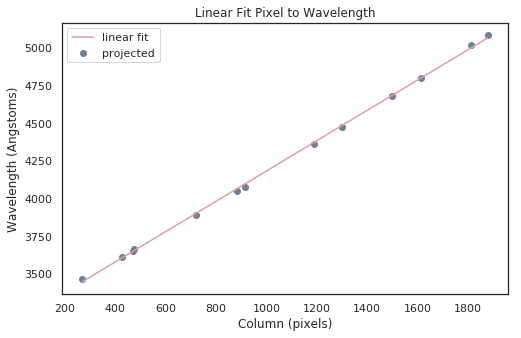

In [276]:
sns.set(style='white')
palette = sns.cubehelix_palette(4, start =1,rot=-.1,  dark=0.7, light=.95, reverse=True)
sns.set_palette(palette)

plt.figure(figsize=(8,5))
plt.xlabel('Column (pixels)') 
plt.ylabel('Wavelength (Angstoms)') 
plt.title('Linear Fit Pixel to Wavelength')
plt.scatter(pixel_loc, wavelengths, label="projected" , color='slategray')
sns.lineplot(pixel_loc, y_fit, label='linear fit', palette = palette)
#plt.savefig("Man.pdf")
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)

In [126]:
hdu_solar = fits.open('/home/jovyan/ASTR_136/Spec/solar spectrum.fits')
header_solar = hdu_solar[0].header
solar_exp = header_solar['EXPTIME']
solar_data = hdu_solar[0].data

solar = solar_data/solar_exp
solar_cut = solar[:,50:2062] #cuts first and last 50 rows

Text(0, 0.5, 'Rows (Pixels)')

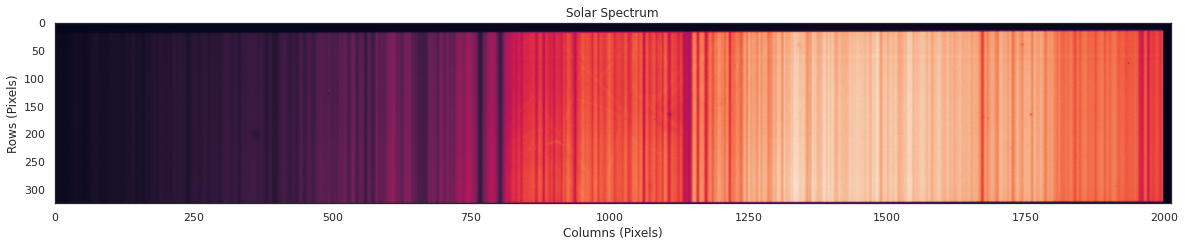

In [127]:
plt.figure(figsize=(20,40))
plt.imshow(solar_cut)
plt.title('Solar Spectrum')
plt.xlabel('Columns (Pixels)')
plt.ylabel('Rows (Pixels)')

In [244]:
flux = np.mean(solar_cut, axis = 0)
wave_func = func(columns,m,b)

In [247]:
wave_func = np.array(wave_func)
wave_func.shape

(2012,)

In [279]:
wave_func/10

array([317.65442262, 317.75493916, 317.85545571, ..., 519.59216284,
       519.69267939, 519.79319593])

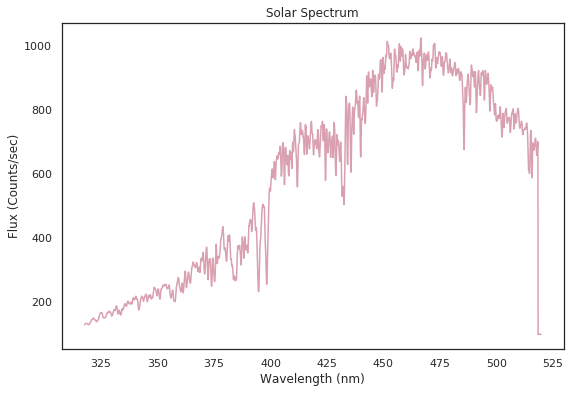

In [291]:
sns.set(style='white')
palette = sns.cubehelix_palette(4, start =1,rot=-.1,  dark=0.7, light=.95, reverse=True)
sns.set_palette(palette)

plt.figure(figsize=(9,6))
plt.xlabel('Wavelength (nm)') 
plt.ylabel('Flux (Counts/sec)') 
plt.title('Solar Spectrum')
sns.lineplot(wave_func/10,flux, palette = palette)

### EXERCISE B

In [2]:
hdu_sci = fits.open('/home/jovyan/ASTR_136/Spec/sci_test.fits')
header_sci = hdu_sci[0].header
sci_exp = header_sci['EXPTIME']
sci_data = hdu_sci[0].data

sci = sci_data/sci_exp
#arcs = arcs[:,50:2062] #cuts first and last 50 rows

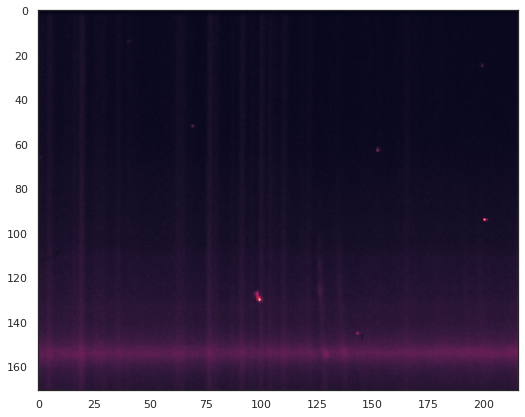

In [4]:
sns.set(style='white')
plt.figure(figsize=(10,7))
plt.imshow(sci) #wavelength = x-axis

In [5]:
sci_cut = sci[10:140,:]

In [6]:
sci_cut.shape

(130, 216)

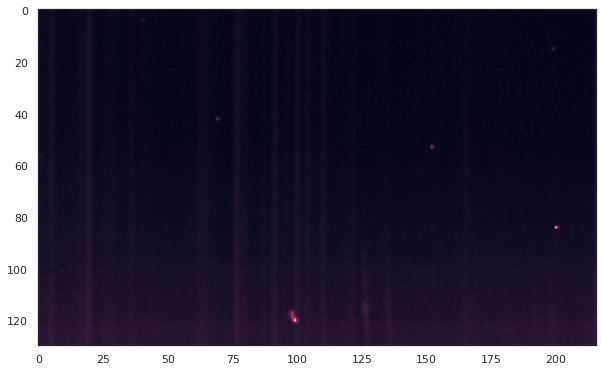

In [117]:
plt.figure(figsize=(10,7))
plt.imshow(sci_cut)

In [8]:
spatial = np.sum(sci_cut, axis = 0)
y = np.arange(0,216,1)

Text(0, 0.5, 'Intensity (Counts)')

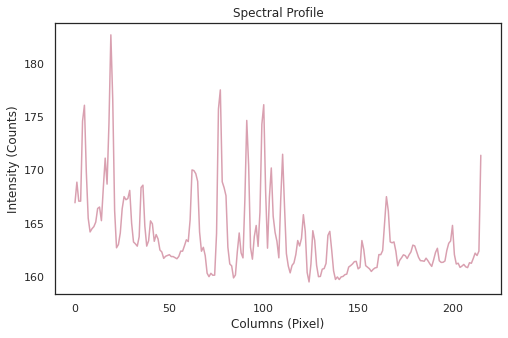

In [115]:
palette = sns.cubehelix_palette(4, start =1,rot=-.1,  dark=0.7, light=.95, reverse=True)
sns.set_palette(palette)

plt.figure(figsize = (8,5))
sns.lineplot(y,spatial)
plt.title('Spectral Profile')
plt.xlabel('Columns (Pixel)')
plt.ylabel('Intensity (Counts)')

In [23]:
spectral = np.sum(sci, axis = 1)
x = np.arange(0,171,1)

Text(0, 0.5, 'Intensity (Counts)')

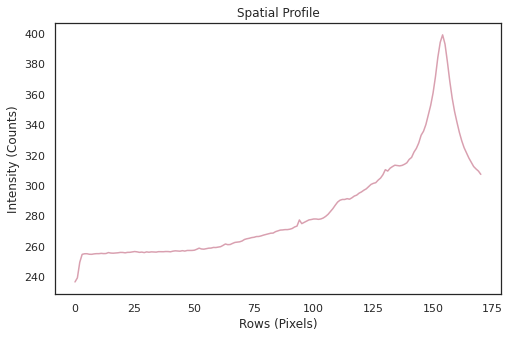

In [116]:
palette = sns.cubehelix_palette(4, start =1,rot=-.1,  dark=0.7, light=.95, reverse=True)
sns.set_palette(palette)

plt.figure(figsize=(8,5))
sns.lineplot(x,spectral)
plt.title('Spatial Profile')
plt.xlabel('Rows (Pixels)')
plt.ylabel('Intensity (Counts)')


In [118]:
columns = np.arange(0,216,1)
fullrows = sci[:,0]
rows = np.arange(0,130,1)

In [119]:
back = np.zeros_like(sci)
for col in columns:
    poly =np.polyfit(rows, sci_cut[rows,col], 2)
    back[:, col] = np.polyval(poly, fullrows)

In [120]:
back_sub = sci- back

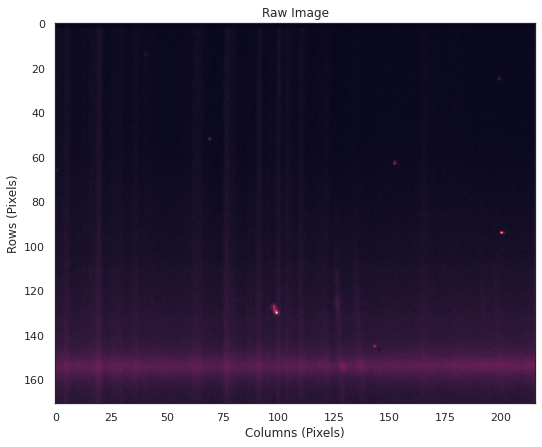

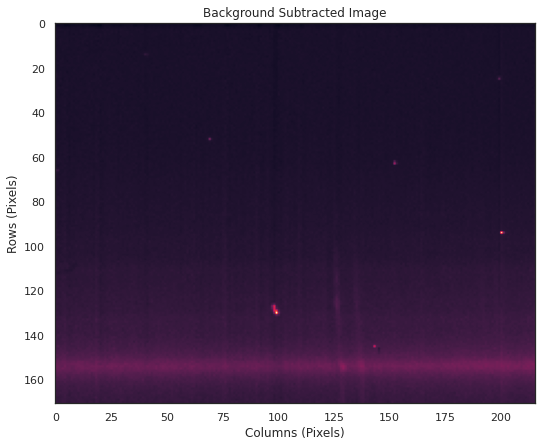

In [124]:
sns.set(style='white')

sns.set(style='white')
plt.figure(figsize=(10,7))
plt.title('Raw Image')
plt.xlabel('Columns (Pixels)')
plt.ylabel('Rows (Pixels)')
plt.imshow(sci)
#wavelength = x-axis

plt.figure(figsize=(10,7))
plt.title('Background Subtracted Image')
plt.xlabel('Columns (Pixels)')
plt.ylabel('Rows (Pixels)')
plt.imshow(back_sub) #wavelength = x-axis